In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import NEMtropy as nem
import numpy as np

In [2]:
# Load the datasets from the assignment_1_data folder
path = "World_Trade_Web/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_graphml(path + f) for f in files]

graph_names = {k: v for k, v in zip(files, gmls)}

In [3]:
def calc_strength_assortativity(G, directed):
    strength_assortativity = {}
    if not directed:
        strength_assortativity["undirected"] = nx.degree_pearson_correlation_coefficient(G, weight="weight")
    else:
        for d1 in ["in", "out"]:
            for d2 in ["in", "out"]:
                strength_assortativity[d1 + "-" + d2] = nx.assortativity.degree_pearson_correlation_coefficient(G, d1, d2, weight="weight")
    return strength_assortativity

In [4]:
strength_assortativities = {graph_name: calc_strength_assortativity(G) for graph_name, G in graph_names.items()}

In [5]:
print("Strength assortativities:")
for graph_name, strength_assortativity in strength_assortativities.items():
    print(graph_name)
    print(strength_assortativity)
    print()

Strength assortativities:
WDN_1992.txt.graphml
{'in-in': -0.04868776409103547, 'in-out': -0.0466474043409241, 'out-in': -0.05986979308699113, 'out-out': -0.05760318920541253}

WDN_1993.txt.graphml
{'in-in': -0.06537929984057984, 'in-out': -0.06218986718761517, 'out-in': -0.07202068872957698, 'out-out': -0.06910618411247664}

WDN_1994.txt.graphml
{'in-in': -0.07868988970611746, 'in-out': -0.07622523439269692, 'out-in': -0.0802250161794804, 'out-out': -0.078001430588214}

WDN_1995.txt.graphml
{'in-in': -0.07921393553292676, 'in-out': -0.07702100817504186, 'out-in': -0.0783064580195059, 'out-out': -0.07638722326404544}

WDN_1996.txt.graphml
{'in-in': -0.07686964594097984, 'in-out': -0.07546909805023216, 'out-in': -0.07535502512416258, 'out-out': -0.07420828746119353}

WDN_1997.txt.graphml
{'in-in': -0.07368635207387715, 'in-out': -0.07132955497657793, 'out-in': -0.07171683897072381, 'out-out': -0.06970079872009392}

WDN_1998.txt.graphml
{'in-in': -0.06557057818395712, 'in-out': -0.0654061

In [6]:
def calc_strengths(G):
    in_strength = {}
    out_strength = {}

    # Calculate out-strengths
    for node, successors in G.succ.items():
        out_strength[node] = sum(weight for weights in successors.values() for weight in weights.values() if weight is not None)

    # Calculate in-strengths
    for node, predecessors in G.pred.items():
        in_strength[node] = sum(weight for weights in predecessors.values() for weight in weights.values() if weight is not None)

    return {"in": in_strength, "out": out_strength}

In [7]:
strengths = {}
for graph_name, G in graph_names.items():
    strengths[graph_name] = calc_strengths(G)

In [8]:
decms = {}
uecms = {}

for graph_name, G in graph_names.items():
    # Directed Enhanced Configuration Model
    out_degree = np.array([G.out_degree(node) for node in G.nodes()])
    in_degree = np.array([G.in_degree(node) for node in G.nodes()])

    out_strength = np.array(list(strengths[graph_name]["out"].values()))
    in_strength = np.array(list(strengths[graph_name]["in"].values()))

    # We can initialiase our graph instance with degree and strength sequence
    graph_weighted = nem.DirectedGraph(
        degree_sequence=np.concatenate([out_degree, in_degree]),
        strength_sequence=np.concatenate([out_strength, in_strength]),
    )
    graph_weighted.solve_tool(
        model="crema",
        method="newton",
        initial_guess="random",
        adjacency="dcm_exp",
        method_adjacency="newton",
    )
    decms[graph_name] = graph_weighted

    # Undirected Enhanced Configuration Model
    degree_seq = out_degree + in_degree
    strength_seq = out_strength + in_strength

    graph_weighted = nem.UndirectedGraph(
        degree_sequence=degree_seq, strength_sequence=strength_seq
    )
    graph_weighted.solve_tool(
        model="crema",
        method="newton",
        initial_guess="random",
        adjacency="cm_exp",
        method_adjacency="newton",
    )
    uecms[graph_name] = graph_weighted

c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\NEMtropy\models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\NEMtropy\models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type featu


solution error = 1111366594563.3643


c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\NEMtropy\models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\NEMtropy\models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature


solution error = 565175711638.1216


c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\numba\core\utils.py:613: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 618582681137.7123

solution error = 680534609415.5154

solution error = 406267229844.4789

solution error = 795337764411.6774

solution error = 2212613944206.505

solution error = 902504340601.9164

solution error = 471546285600.65625

solution error = 937700911957.3456

solution error = 505243847679.2653

solution error = 1000051003322.4402

solution error = 532408974723.23083

solution error = 1028259598577.9904

solution error = 559570770635.5127

solution error = 1036898905325.3878

solution error = 591015936649.6942

solution error = 1084140190431.4625

solution error = 586195997858.161

solution error = 1085755750748.8038

solution error = 592785992509.1354

solution error = 3178226031387.385


In [9]:
for graph_name, cm in decms.items():
    print(graph_name + " | DECM | error degree " + str(cm.error_degree) + " | error strength " + str(cm.error_strength))

WDN_1992.txt.graphml | DECM | error degree 2.3552786387881497e-09 | error strength 1111366594563.3643
WDN_1993.txt.graphml | DECM | error degree 5.495230936958251e-09 | error strength 618582681137.7123
WDN_1994.txt.graphml | DECM | error degree 3.733834574859429e-09 | error strength 406267229844.4789
WDN_1995.txt.graphml | DECM | error degree 3.0578668486214156e-09 | error strength 2212613944206.505
WDN_1996.txt.graphml | DECM | error degree 2.7055371276674123e-09 | error strength 471546285600.65625
WDN_1997.txt.graphml | DECM | error degree 3.1945148748491192e-09 | error strength 505243847679.2653
WDN_1998.txt.graphml | DECM | error degree 6.2923675159254344e-09 | error strength 532408974723.23083
WDN_1999.txt.graphml | DECM | error degree 1.6762555787863676e-09 | error strength 559570770635.5127
WDN_2000.txt.graphml | DECM | error degree 2.6565558641777898e-09 | error strength 591015936649.6942
WDN_2001.txt.graphml | DECM | error degree 2.834315893096573e-09 | error strength 58619599

In [10]:
for graph_name, cm in uecms.items():
    print(graph_name + " | UECM | error degree " + str(cm.error_degree) + " | error strength " + str(cm.error_strength))

WDN_1992.txt.graphml | UECM | error degree 96.89562083492052 | error strength 565175711638.1216
WDN_1993.txt.graphml | UECM | error degree 107.5360278133345 | error strength 680534609415.5154
WDN_1994.txt.graphml | UECM | error degree 122.9660958756984 | error strength 795337764411.6774
WDN_1995.txt.graphml | UECM | error degree 127.68329747537295 | error strength 902504340601.9164
WDN_1996.txt.graphml | UECM | error degree 108.0 | error strength 937700911957.3456
WDN_1997.txt.graphml | UECM | error degree 116.00000059523379 | error strength 1000051003322.4402
WDN_1998.txt.graphml | UECM | error degree 140.52403357710588 | error strength 1028259598577.9904
WDN_1999.txt.graphml | UECM | error degree 126.13049619828516 | error strength 1036898905325.3878
WDN_2000.txt.graphml | UECM | error degree 125.00000000003268 | error strength 1084140190431.4625
WDN_2001.txt.graphml | UECM | error degree 127.00004531106859 | error strength 1085755750748.8038
WDN_2002.txt.graphml | UECM | error degre

In [ ]:
path = "dcem_samples_"
for graph_name, cm in decms.items():
    cm.ensemble_sampler(n=30, output_dir=path + graph_name + "/")

In [45]:
decm_sample_networks = {}
# Load the datasets from the assignment_1_data folder
path = "decm_samples_"

for graph_name, cm in decms.items():
    decm_sample_networks[graph_name] = []
    files = [f for f in listdir(path + graph_name) if isfile(join(path + graph_name, f))]
    edgelist_ens = [np.loadtxt(path + graph_name + "/" + f) for f in files]

    for i, e in enumerate(edgelist_ens):
        ens_adj = nem.network_functions.build_adjacency_from_edgelist(edgelist = e,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = True)
        decm_sample_networks[graph_name].append(nx.from_numpy_array(ens_adj))

In [ ]:
path = "uecm_samples_"
for graph_name, cm in uecms.items():
    cm.ensemble_sampler(n=30, output_dir=path + graph_name + "/")

In [46]:
uecm_sample_networks = {}
# Load the datasets from the assignment_1_data folder
path = "uecm_samples_"

for graph_name, cm in uecms.items():
    uecm_sample_networks[graph_name] = []
    files = [f for f in listdir(path + graph_name) if isfile(join(path + graph_name, f))]
    edgelist_ens = [np.loadtxt(path + graph_name + "/" + f) for f in files]

    for i, e in enumerate(edgelist_ens):
        ens_adj = nem.network_functions.build_adjacency_from_edgelist(edgelist = e,
                                                is_directed = False,
                                                is_sparse = False,
                                                is_weighted = True)
        uecm_sample_networks[graph_name].append(nx.from_numpy_array(ens_adj))

In [57]:
def calc_strength_assortativity_avg_std(ens, directed):
    strength_assortativity_avg_std = {}
    if not directed:
        key = "undirected"
        values = [calc_strength_assortativity(G, directed=directed)[key] for G in ens]
        strength_assortativity_avg_std[key] = {
            "average": np.mean(values),
            "standard deviation": np.std(values),
        }
    else:
        for d1 in ["in", "out"]:
            for d2 in ["in", "out"]:
                key = f"{d1}-{d2}"
                values = [calc_strength_assortativity(G, directed=directed)[key] for G in ens]

                strength_assortativity_avg_std[key] = {
                    "average": np.mean(values),
                    "standard deviation": np.std(values),
                }
    return strength_assortativity_avg_std

In [58]:
uecm_sample_networks_strength_assortativity_avg_std = {}

for graph_name, ens in uecm_sample_networks.items():
    uecm_sample_networks_strength_assortativity_avg_std[graph_name] = calc_strength_assortativity_avg_std(ens, directed=False)

In [84]:
print("UECM sample networks strength assortativities:")
for graph_name, strength_assortativity in uecm_sample_networks_strength_assortativity_avg_std.items():
    print(graph_name)
    print(strength_assortativity)
    print()

UECM sample networks strength assortativities:
WDN_2000.txt.graphml
{'undirected': {'average': -0.009456464998748181, 'standard deviation': 8.275852436077439e-05}}

WDN_2001.txt.graphml
{'undirected': {'average': -0.009053310664481961, 'standard deviation': 0.0002117702140780679}}

WDN_2002.txt.graphml
{'undirected': {'average': -0.009341387746269409, 'standard deviation': 0.0003053590172807452}}



In [82]:
# Assuming you have the data in a dictionary called decm_sample_networks_strength_assortativities

merged_values = {}

for graph_name, assortativity_data in uecm_sample_networks_strength_assortativity_avg_std.items():
    merged_values[graph_name] = {
        'undirected': {
            'average': np.mean([
                assortativity_data['in-in']['average'],
                assortativity_data['in-out']['average'],
                assortativity_data['out-in']['average'],
                assortativity_data['out-out']['average']
            ]),
            'standard deviation': np.mean([
                assortativity_data['in-in']['standard deviation'],
                assortativity_data['in-out']['standard deviation'],
                assortativity_data['out-in']['standard deviation'],
                assortativity_data['out-out']['standard deviation']
            ])
        }
    }

# Print or use the merged values as needed
print(merged_values)


{'WDN_2000.txt.graphml': {'undirected': {'average': -0.009456464998748181, 'standard deviation': 8.275852436077439e-05}}, 'WDN_2001.txt.graphml': {'undirected': {'average': -0.009053310664481961, 'standard deviation': 0.0002117702140780679}}, 'WDN_2002.txt.graphml': {'undirected': {'average': -0.009341387746269409, 'standard deviation': 0.0003053590172807452}}}


In [83]:
uecm_sample_networks_strength_assortativity_avg_std = merged_values

In [ ]:
decm_sample_networks_strength_assortativity_avg_std = {}

for graph_name, ens in decm_sample_networks.items():
    decm_sample_networks_strength_assortativity_avg_std[graph_name] = calc_strength_assortativity_avg_std(ens, directed=True)

In [47]:
# decm_sample_networks_strength_assortativities = {}
# decm_sample_networks_strength_assortativity_avg_std = {}
# 
# for graph_name, ens in decm_sample_networks.items():
#     decm_sample_networks_strength_assortativities[graph_name] = {}
#     decm_sample_networks_strength_assortativity_avg_std[graph_name] = {}
# 
#     for d1 in ["in", "out"]:
#         for d2 in ["in", "out"]:
#             key = f"{d1}-{d2}"
#             decm_sample_networks_strength_assortativities[graph_name][key] = []
#             decm_sample_networks_strength_assortativity_avg_std[graph_name][key] = {}
# 
#     for G in ens:
#         strength_assortativity = calc_strength_assortativity(G)
#         for d1 in ["in", "out"]:
#             for d2 in ["in", "out"]:
#                 key = f"{d1}-{d2}"
#                 decm_sample_networks_strength_assortativities[graph_name][key].append(strength_assortativity[key])
# 
#     for d1 in ["in", "out"]:
#         for d2 in ["in", "out"]:
#             key = f"{d1}-{d2}"
#             values = decm_sample_networks_strength_assortativities[graph_name][key]
# 
#             decm_sample_networks_strength_assortativity_avg_std[graph_name][key]["average"] = np.mean(values)
#             decm_sample_networks_strength_assortativity_avg_std[graph_name][key]["standard deviation"] = np.std(values) 

In [48]:
print("Strength assortativities:")
for graph_name, strength_assortativity in decm_sample_networks_strength_assortativity_avg_std.items():
    print(graph_name)
    print(strength_assortativity)
    print()

Strength assortativities:
WDN_2000.txt.graphml
{'in-in': {'average': -0.014409011312571612, 'standard deviation': 0.0016760953127529863}, 'in-out': {'average': -0.014409011312571612, 'standard deviation': 0.0016760953127529863}, 'out-in': {'average': -0.014409011312571612, 'standard deviation': 0.0016760953127529863}, 'out-out': {'average': -0.014409011312571612, 'standard deviation': 0.0016760953127529863}}

WDN_2001.txt.graphml
{'in-in': {'average': -0.016963427727039005, 'standard deviation': 0.0025786643925126483}, 'in-out': {'average': -0.016963427727039005, 'standard deviation': 0.0025786643925126483}, 'out-in': {'average': -0.016963427727039005, 'standard deviation': 0.0025786643925126483}, 'out-out': {'average': -0.016963427727039005, 'standard deviation': 0.0025786643925126483}}

WDN_2002.txt.graphml
{'in-in': {'average': -0.007633402393609288, 'standard deviation': 0.0012858928466495702}, 'in-out': {'average': -0.007633402393609288, 'standard deviation': 0.0012858928466495702

TypeError: list indices must be integers or slices, not str

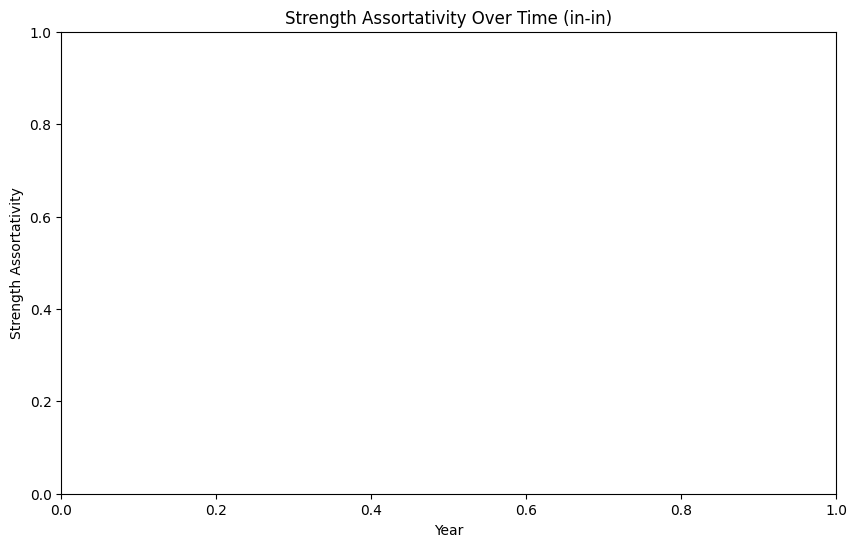

In [71]:
import re

def plot_strength_assortativity_over_time(graphs, strengths, decm_sample_networks, decm_sample_networks_avg_std):
    # get year from graph name
    time_values = sorted([year for year in graphs.keys() if year in ["WDN_2000.txt.graphml", "WDN_2001.txt.graphml", "WDN_2002.txt.graphml"]])
    assortativity_types = ["in-in", "in-out", "out-out"]

    for assortativity_type in assortativity_types:
        plt.figure(figsize=(10, 6))
        plt.title(f"Strength Assortativity Over Time ({assortativity_type})")
        plt.xlabel("Year")
        plt.ylabel("Strength Assortativity")

        observed_values = []
        for year in time_values:
            if assortativity_type == "in-in":
                observed_values.append(strengths[str(year)]["in-in"])
            elif assortativity_type == "in-out":
                observed_values.append(strengths[str(year)]["in-out"])
            elif assortativity_type == "out-out":
                observed_values.append(strengths[str(year)]["out-out"])

        for sample_type in ["average", "standard deviation"]:
            error_bars = []
            for year in time_values:
                error_bars.append(decm_sample_networks_avg_std[str(year)][assortativity_type][sample_type])

            plt.errorbar(
                time_values,
                [np.mean(decm_sample_networks[str(year)][assortativity_type]) for year in time_values],
                yerr=error_bars,
                label=f"{sample_type.capitalize()} from Samples",
                linestyle='dashed',
                marker='o'
            )

        plt.plot(time_values, observed_values, label="Observed", marker='o', color='black')

        plt.xticks(time_values)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_strength_assortativity_over_time(graph_names, strength_assortativities, decm_sample_networks, decm_sample_networks_strength_assortativity_avg_std)


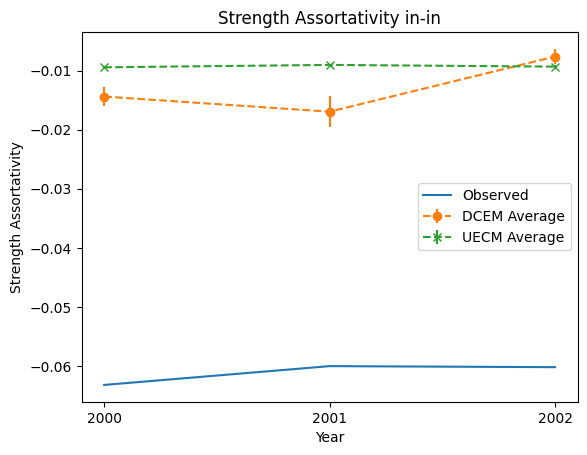

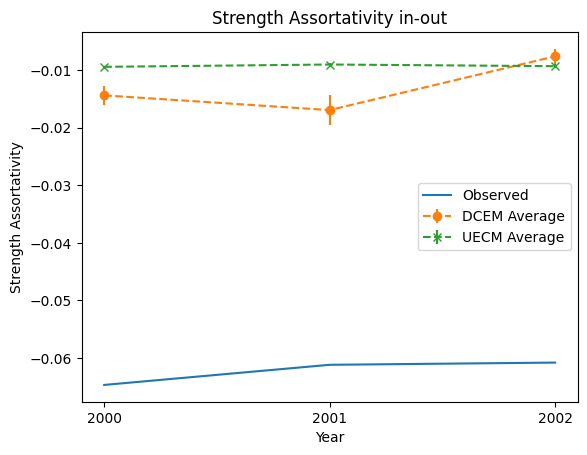

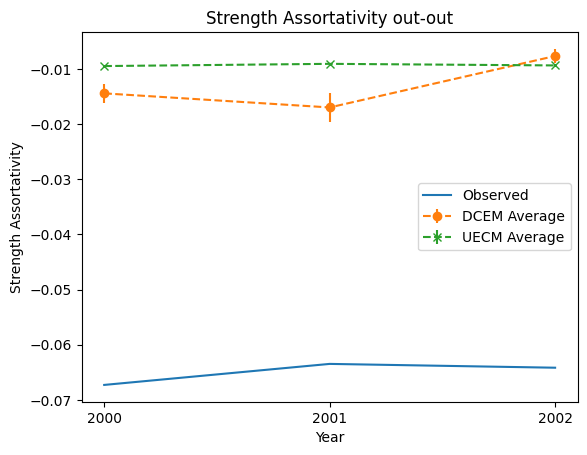

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have obtained these values from your calculations
graph_names = ["WDN_2000.txt.graphml", "WDN_2001.txt.graphml", "WDN_2002.txt.graphml"]  # Replace with your actual years
real_values = strength_assortativities  # Replace with your actual observed strength assortativities
decm_avg_std_values = decm_sample_networks_strength_assortativity_avg_std # Replace with your calculated average and standard deviation values
uecm_avg_std_values = uecm_sample_networks_strength_assortativity_avg_std # Replace with your calculated average and standard deviation values


# Function to plot strength assortativity with error bars
def plot_strength_assortativity(assortativity_type):
    key = f"{assortativity_type[0]}-{assortativity_type[1]}"

    real_data = np.array([real_values[graph_name][key] for graph_name in graph_names])
    decm_avg_data = np.array([decm_avg_std_values[graph_name][key]['average'] for graph_name in graph_names])
    decm_std_data = np.array([decm_avg_std_values[graph_name][key]['standard deviation'] for graph_name in graph_names])
    uecm_avg_data = np.array([uecm_avg_std_values[graph_name]['undirected']['average'] for graph_name in graph_names])
    uecm_std_data = np.array([uecm_avg_std_values[graph_name]['undirected']['standard deviation'] for graph_name in graph_names])

    years = [re.search(r'\d+', graph_name).group() for graph_name in graph_names]

    plt.plot(years, real_data, label='Observed', linestyle='-')
    plt.errorbar(years, decm_avg_data, yerr=decm_std_data, label='DCEM Average', marker='o', linestyle='--')
    plt.errorbar(years, uecm_avg_data, yerr=uecm_std_data, label='UECM Average', marker='x', linestyle='--')
    
    plt.xlabel('Year')
    plt.ylabel('Strength Assortativity')
    plt.title(f'Strength Assortativity {assortativity_type[0]}-{assortativity_type[1]}')
    plt.legend()
    plt.show()

for assortativity_type in [("in", "in"), ("in", "out"), ("out", "out")]:
    plot_strength_assortativity(assortativity_type)
